This notebook will demostrate how to match catalogs with this package.
[TOC]

## Data I/O
Let's import necessary packages and prepare our data first:

In [1]:
from astrotable.table import Data, Subset
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = Data('samples/catalog_p1.csv', name='data')
data.t

x,y,z,obj_class
float64,float64,float64,str1
-4.465765915024047,-1.1803787039723304,3.933749106382124,A
-11.595113898732713,-4.049155438745423,-7.647153605424485,A
-13.658096030485229,-7.48624417464929,3.526735390303081,B
11.604269139452764,6.281875669082035,4.782030684043313,A
-0.14761531392540045,1.227243258605626,-20.026283817567307,B
14.085948012644096,13.133971787299929,34.5262446878855,B
2.2880323941946723,6.392166696793526,26.721939201307457,B
-8.154232849490825,1.271469183122783,-14.29833019843536,B
-9.120396489096619,-4.41957805036524,22.581003104515645,B


`data.t` is an `astropy.table.Table` object. 
For more information on data input/output, see [tutorial 1](tutorial1_matching.ipynb).

## Subsets
Sometimes we need to specify row subsets of the dataset `data`. For example, maybe you would like to study records that satisfies both $z>0$ and $x>0$. The traditional method is selecting these data with indexing:

In [3]:
my_selected_subset = data.t[(data.t['z']>0) & (data.t['x']>0)]

This may be troublesome if multiple subsets (and even the intersection, union and complementary sets of them) are involved in your study.

In this package, various methods of specifying subsets are demostrated below:

### Specifying subsets from selection criteria
To specify a row subset, you need to input a selection criteria (e.g. $z>0$), which all records in this subset should satisfy.

To define a subset of `data` that satisfies $z>0$ AND $x>0$:

In [4]:
subset1 = data.add_subsets(Subset((data.t['z']>0) & (data.t['x']>0), name='subset1'))

You may also directly input a string:

In [5]:
subset1 = data.add_subsets(Subset('(z>0) & (x>0)', name='subset1'))

Subset: evaluating (data.t['z']>0) & (data.t['x']>0)


The method will try to automatically convert the string into expressions like `(data.t['z']>0) & (data.t['x']>0)`. However, you should check the output to make sure the inferred logical expressions are correct.

One last way to specify the subset is inputting a function:

In [6]:
selection = lambda t: (t['z']>0) & (t['x']>0)
subset1 = data.add_subsets(Subset(selection, name='subset1'))

The input function `selection` takes an `astropy.table.Table` object as input, and returns the boolean array (i.e. the value of expression `(t['z']>0) & (t['x']>0)`).

`subset1` is a `Subset` object, which contains the information of the selection, rather than the full data table:

In [7]:
subset1

Subset(name='subset1', selection=array([False, False, False, ..., False, False,  True]))

To extract the dataset of this subset ($z>0$ AND $x>0$), input the name (`'subset1'`, as setted with `name='subset1'`) to `data.subset_data`:

In [8]:
subset1_data = data.subset_data('subset1') # subset1_data is an astrotable.table.Data object
subset1_data.t

x,y,z,obj_class
float64,float64,float64,str1
11.604269139452764,6.281875669082035,4.782030684043313,A
14.085948012644096,13.133971787299929,34.5262446878855,B
2.2880323941946723,6.392166696793526,26.721939201307457,B
7.870877221958985,2.4497515467137005,4.8548683183511265,A
10.629256472615845,3.454185077945545,20.411033679800703,A
9.047572683607877,7.12001031357844,6.851401674467137,B
18.447207791749573,7.385454779960607,54.37398357585805,B
21.618444090858567,15.295692551348754,29.015401534486458,B
9.638420579769054,5.566364591560875,21.455050618925668,A


Alternatively, you may also convert a `subset1` object to a boolean array:

In [9]:
subset1_table = data.t[np.array(subset1)]
subset1_table

x,y,z,obj_class
float64,float64,float64,str1
11.604269139452764,6.281875669082035,4.782030684043313,A
14.085948012644096,13.133971787299929,34.5262446878855,B
2.2880323941946723,6.392166696793526,26.721939201307457,B
7.870877221958985,2.4497515467137005,4.8548683183511265,A
10.629256472615845,3.454185077945545,20.411033679800703,A
9.047572683607877,7.12001031357844,6.851401674467137,B
18.447207791749573,7.385454779960607,54.37398357585805,B
21.618444090858567,15.295692551348754,29.015401534486458,B
9.638420579769054,5.566364591560875,21.455050618925668,A


You can also define multiple subset at a time:

In [10]:
subset2, subset3, subset4 = data.add_subsets(
    Subset('(x<0) | (z<0)', name='subset2'), # x<0 OR z<0
    Subset('~(y<5)', name='subset3'), # NOT (y<5)
    Subset(np.isin(data.t['obj_class'], ['A', 'B']), name='subset4'), # obj_class in {'A', 'B'}
    )

Subset: evaluating (data.t['x']<0) | (data.t['z']<0)
Subset: evaluating ~(data.t['y']<5)


### Convenient methods for subset definition
There are also two convenient methods to define subsets:

In [11]:
data.add_subsets(
    Subset.by_range(x=[0, 5], y=[0, np.inf]), # (x>0) & (x<5) & (y>0) 
    Subset.by_value('obj_class', 'A'), # obj_class == 'A'
    )

(Subset(name='x(0-5)&y(0-inf)', selection=array([False, False, False, ..., False, False, False])),
 Subset(name='obj_class=A', selection=array([ True,  True, False, ..., False, False, False])))

When using the above methods, the names are automatically set (see below and `help(Subset.by_range)`, `help(Subset.by_value)` for details).

### Summary of subsets

Now let's have a look at all the subsets defined so far:

In [12]:
data.subset_summary()

group,name,size,fraction,expression,label
str7,str15,int32,float64,str46,str28
default,all,3500,1.0,all,All
default,subset1,867,0.24771428571428572,selection = lambda t: (t['z']>0) & (t['x']>0)\n,subset1
default,subset2,2633,0.7522857142857143,(x<0) | (z<0),subset2
default,subset3,874,0.24971428571428572,~(y<5),subset3
default,subset4,3500,1.0,<array>,subset4
default,x(0-5)&y(0-inf),512,0.1462857142857143,(x > 0) & (x < 5) & (y > 0) & (y < inf),"x$\in$(0, 5), y$\in$(0, inf)"
default,obj_class=A,2000,0.5714285714285714,obj_class=A,A


The columns of the above table are:
- **group**: The name of the subset group, which will be introduced in the next section.
- **name**: The name of the subset, which can be manully set by `Subset(<...>, name=<...>)`.
- **size**: The size of this subset.
- **fraction**: The fraction of this subset relative to the whole dataset `data`.
- **expression**: A hint of the expression of the selection that specifies this subset. This can be manually set by `Subset(<...>, expression=<...>)`
- **label**: The string that is used for this subset in plots (e.g. label in legends and titles; see the plotting section for examples). This can be manually set by `Subset(<...>, label=<...>)`.

We can also see that there is always a subset called "all", which consists of all records in the dataset (that is, the whole dataset).

<!-- concept of [group](#Subset groups) will be introduced -->

Now let's clear all subsets defined above (the subset "all" is never deleted):

In [13]:
data.clear_subsets()
data.subset_summary() 

group,name,size,fraction,expression,label
str7,str3,int32,float64,str3,str3
default,all,3500,1.0,all,All


## Subset groups
This package introduces the concept of a "subset group", which is a group of subset. This is extremely useful when you need groups of related subsets. 

For example, you may want to divide the dataset according to the value of `obj_class`. You can define subsets in a new subset group called 'class':

In [14]:
data.add_subsets(
    Subset.by_value('obj_class', 'A'), # obj_class == 'A'
    Subset.by_value('obj_class', 'B'), # obj_class == 'B'
    group='class',
    )

(Subset(name='obj_class=A', selection=array([ True,  True, False, ..., False, False, False])),
 Subset(name='obj_class=B', selection=array([False, False,  True, ...,  True,  True,  True])))

This can be easily done with a convenient method of `data`:

In [15]:
# data.subset_group_from_values('obj_class', group_name='class') 
# -> ValueError: A subset group with name "class" already exists.
data.subset_group_from_values('obj_class', group_name='class', overwrite=True) 

Since a group named "class" already exists, we have to pass `overwrite=True`, though this is not necessary if group "class" has not been defined before.

In some other situations, you may want to define a group of subsets with bins of some quantity:

In [16]:
data.subset_group_from_ranges(
    'x', [[-20, -10], [-10, 0], [0, 10], [10, 20]], # 4 bins specified for x
    group_name='x_binning', overwrite=True, # optional arguments
    )

We can understand the outcome of the above codes by checking the `subset_summary()`:

In [17]:
data.subset_summary()

group,name,size,fraction,expression,label
str9,str11,int32,float64,str21,str16
default,all,3500,1.0,all,All
class,obj_class=A,2000,0.5714285714285714,obj_class=A,A
class,obj_class=B,1500,0.42857142857142855,obj_class=B,B
x_binning,x(-20--10),493,0.14085714285714285,(x > -20) & (x < -10),"x$\in$(-20, -10)"
x_binning,x(-10-0),1198,0.3422857142857143,(x > -10) & (x < 0),"x$\in$(-10, 0)"
x_binning,x(0-10),1165,0.33285714285714285,(x > 0) & (x < 10),"x$\in$(0, 10)"
x_binning,x(10-20),480,0.13714285714285715,(x > 10) & (x < 20),"x$\in$(10, 20)"


By default, if you do not specify the group name (e.g. `group` when calling `data.add_subsets()`), the group name will be "default". 

To extract the dataset of a subset in a non-default group, use one of the expressions below:

In [18]:
class_A_data = data.subset_data('class/obj_class=A')
class_A_data = data.subset_data(group='class', name='obj_class=A')

## Making single plots
### Quick reference
The simplest way to make a plot with `astrotable.table.Data` is:

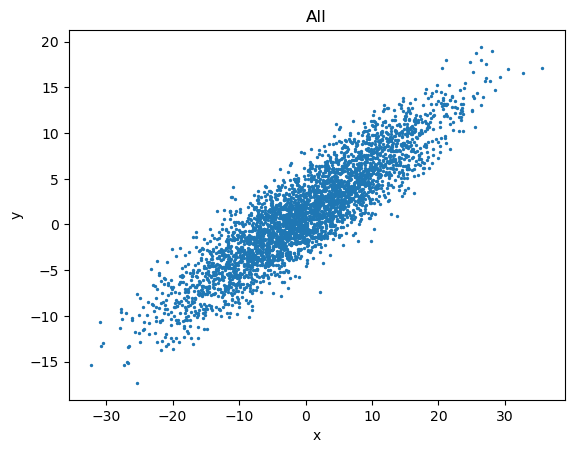

In [19]:
data.plot('scatter', cols=['x', 'y'], s=2)
# equivalent to:
# plt.scatter(data.t['x'], data.t['y'], s=2)

Where:
- `'scatter'` is the type of the plot. Supported types are: `'plot', 'scatter', 'hist', 'hist2d', 'errorbar'`, which corresponds to `plt.plot, plt.scatter, ...`
- `cols=['x', 'y']` specifies the column names of the dataset to be used for the plot.
- `s=2` is a keyword argument passed to the plot function (in this case, `plt.scatter`).

To make a plot comparing different subsets in a subset group (say, `'class'`):

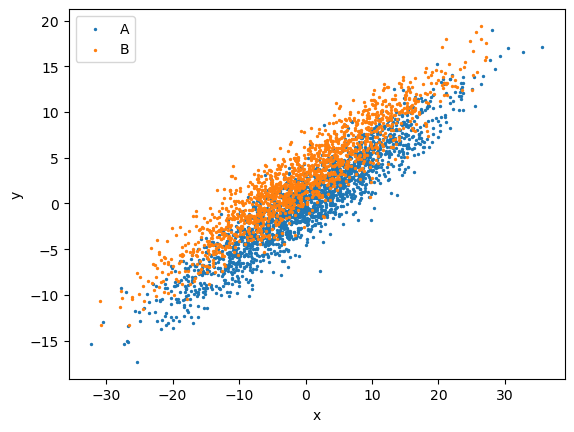

In [20]:
data.plot('scatter', cols=['x', 'y'], groups='class', s=2)

Note that in the above figure, the legend is the labels of the subsets, as shown in the output of `data.subset_summary()`.

To make a plot comparing different subsets:

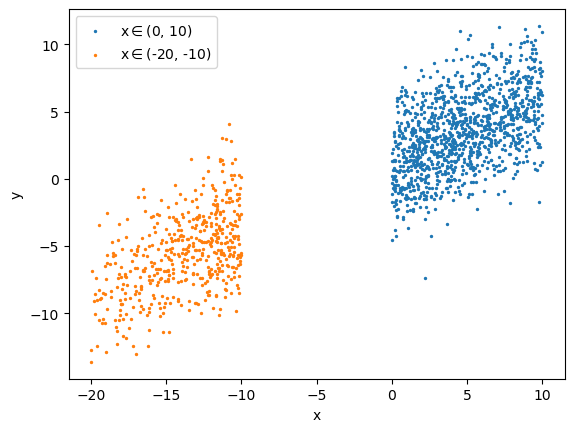

In [21]:
data.plot('scatter', cols=['x', 'y'], s=2,
          paths=['x_binning/x(0-10)', 'x_binning/x(-20--10)'],
          )

To make a plot with columns in the dataset as keyword arguments of the plot function:

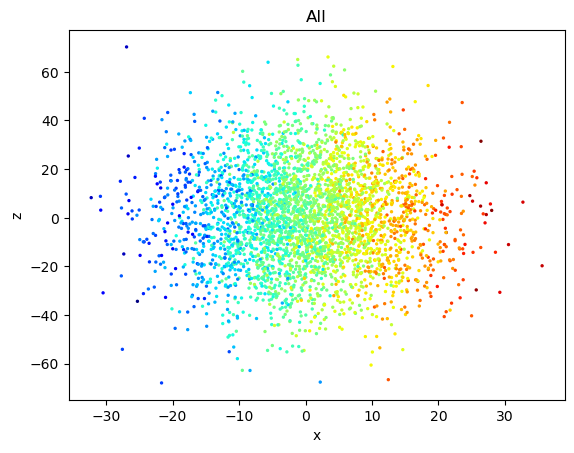

In [22]:
data.plot('scatter', cols=['x', 'z'], kwcols=dict(c='y'), s=2, cmap='jet')
# equivalent to:
# plt.scatter(data.t['x'], data.t['z'], c=data.t['y'], s=2, cmap='jet')

To require that all data on the plot are elements of one specific subset, provide a global selection:

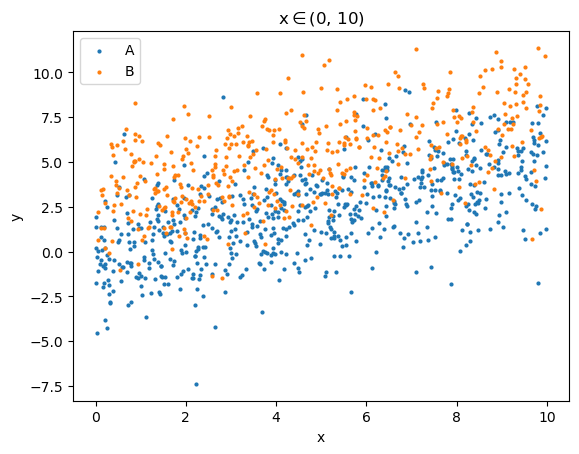

In [23]:
data.plot('scatter', cols=['x', 'y'], groups='class', global_selection='x_binning/x(0-10)', s=4)

We can see that only those with $x\in(0, 10)$ are shown on the plot. The global selection is automatically written in the title.

### Advanced features
<!--For simple tasks, the above should be enough. If you would like more control on plotting-->
#### Labels of columns
By default, the labels on the axes are the column names. If you want to adjust the label of the columns, you can execute:

In [24]:
data.set_labels(x='My label of $x$', y='My label of $y$')

The setted labels can be accessed with

In [25]:
data.col_labels

{'x': 'My label of $x$', 'y': 'My label of $y$'}

Now the plot becomes

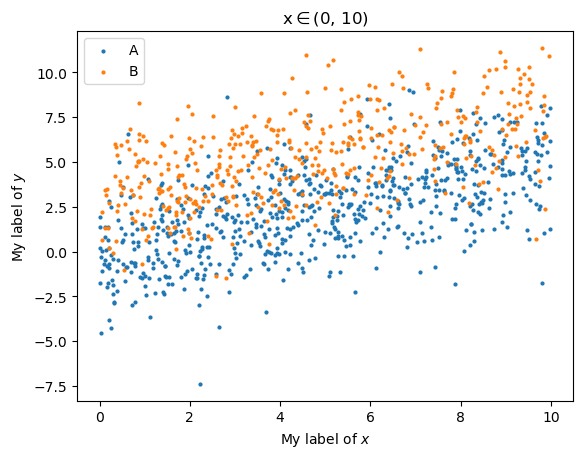

In [26]:
data.plot('scatter', cols=['x', 'y'], groups='class', global_selection='x_binning/x(0-10)', s=4)

In [27]:
data.col_labels = {} # clear the labels

#### Custom plot function
This part is for advanced users. If you are new to this package, you may skip this part for now.

Sometimes you need more control on the plot. In general, you can input a function (rather than strings such as `'scatter'`) to `data.plot`.

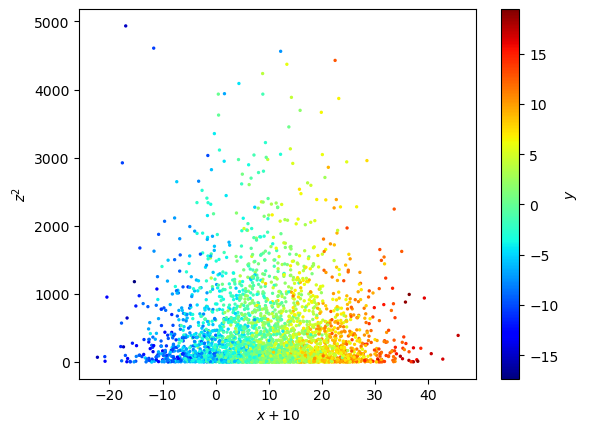

In [28]:
fig, ax = plt.subplots(1, 1)
def my_plot(x, z, **kwargs):
    s = ax.scatter(x+10, z**2, **kwargs)
    ax.set_xlabel('$x+10$')
    ax.set_ylabel('$z^2$')
    cax = plt.colorbar(s)
    cax.set_label('$y$')
data.plot(my_plot, cols=['x', 'z'], kwcols=dict(c='y'), s=2, cmap='jet',
          autolabel=False, # we don't want to use automatically generated labels/titles this time
          )

## Subplot arrays
### Basic usage
The concept of "subplot array" is one of the hightlights of this package.
To understand this concept, let's take a look at an example first:

In [29]:
data.subset_group_from_ranges('x', [[-20, -10], [-10, 0], [0, 10], [10, 20]]) # the default name of the group is 'x'
data.subset_group_from_ranges('z', [[-40, 0], [0, 40]]) # the default name of the group is 'z'
data.clear_subsets('x_binning') # delete subset group 'x_binning'
data.subset_summary()

group,name,size,fraction,expression,label
str7,str11,int32,float64,str21,str16
default,all,3500,1.0,all,All
class,obj_class=A,2000,0.5714285714285714,obj_class=A,A
class,obj_class=B,1500,0.42857142857142855,obj_class=B,B
x,x(-20--10),493,0.14085714285714285,(x > -20) & (x < -10),"x$\in$(-20, -10)"
x,x(-10-0),1198,0.3422857142857143,(x > -10) & (x < 0),"x$\in$(-10, 0)"
x,x(0-10),1165,0.33285714285714285,(x > 0) & (x < 10),"x$\in$(0, 10)"
x,x(10-20),480,0.13714285714285715,(x > 10) & (x < 20),"x$\in$(10, 20)"
z,z(-40-0),1671,0.4774285714285714,(z > -40) & (z < 0),"z$\in$(-40, 0)"
z,z(0-40),1681,0.48028571428571426,(z > 0) & (z < 40),"z$\in$(0, 40)"


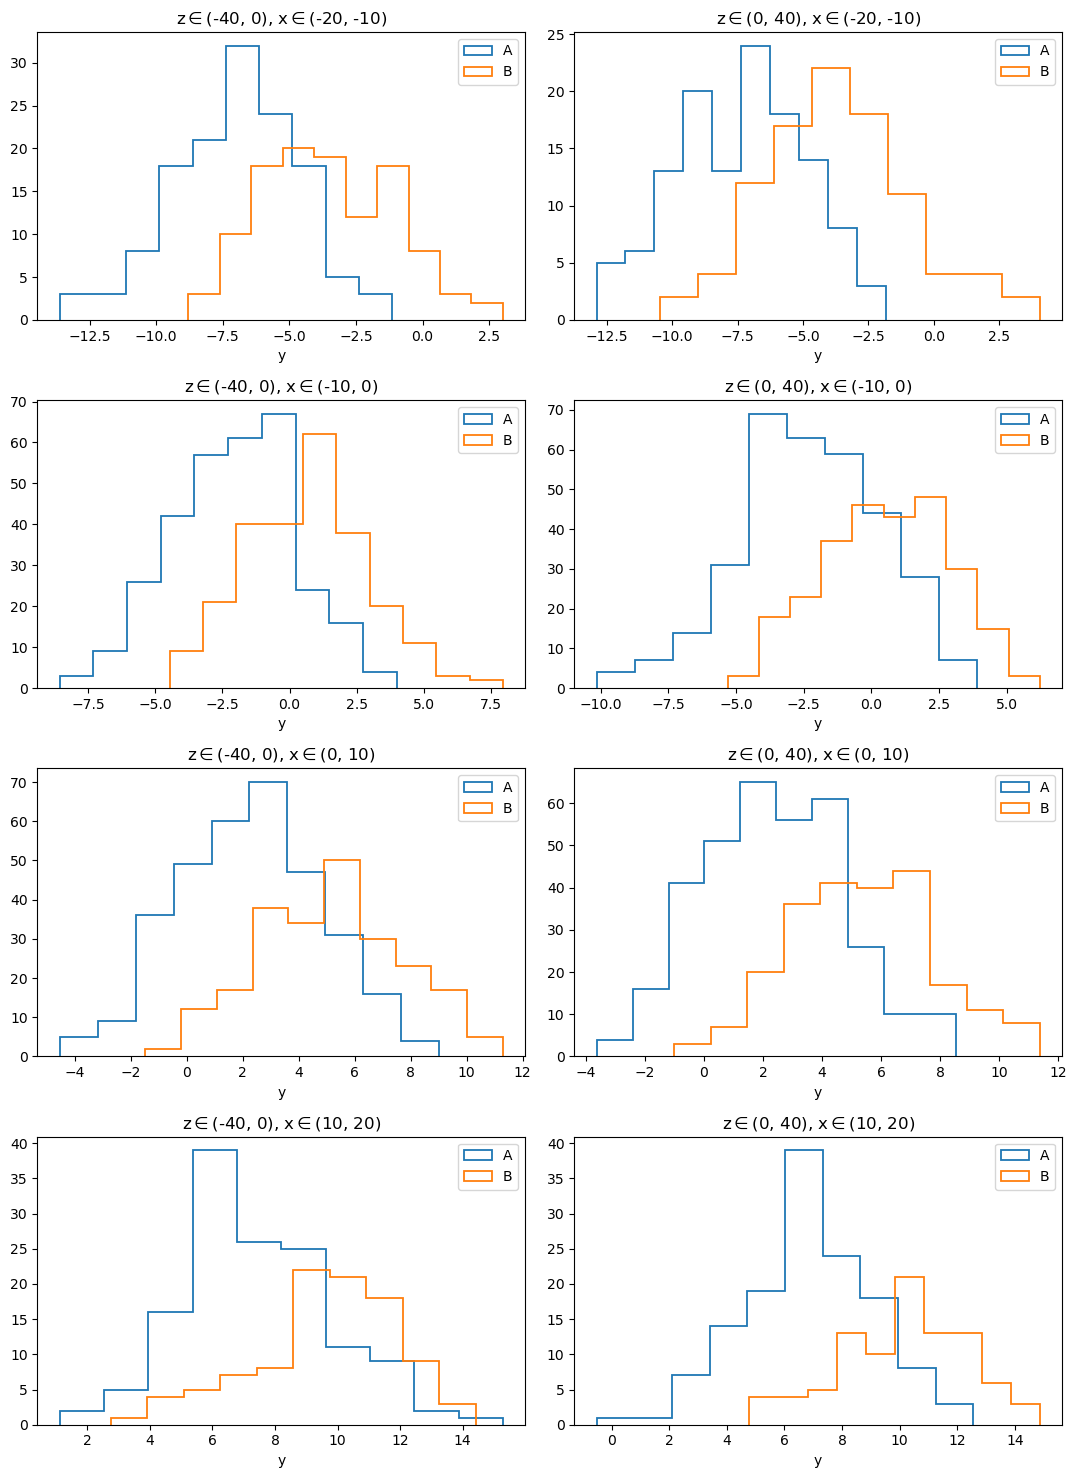

In [30]:
data.subplot_array(
    'hist', cols=['y'], histtype='step', linewidth=1.3, # note: kwcols is also supported
    plotgroups='class', # subset group for comparison within each subplot
    arraygroups=['z', 'x'], # subset group for comparison between each subplot
    )
plt.tight_layout()

As we have seen in this example, the subset group `'x'` has 4 subsets, and group `'z'` has 2 subsets. By passing the argument `arraygroups=['z', 'x']`, the 2 subset groups are used to generate a $4\times 2$ subplot "array". The different rows have different selections of $x$, while different columns have different selections of $z$. By passing the argument `plotgroups='class'`, the 2 subsets in the subset group named `'class'` are plotted within each panel (subplot).

Sometimes you may want to generate a $1\times n$ subplot "array":

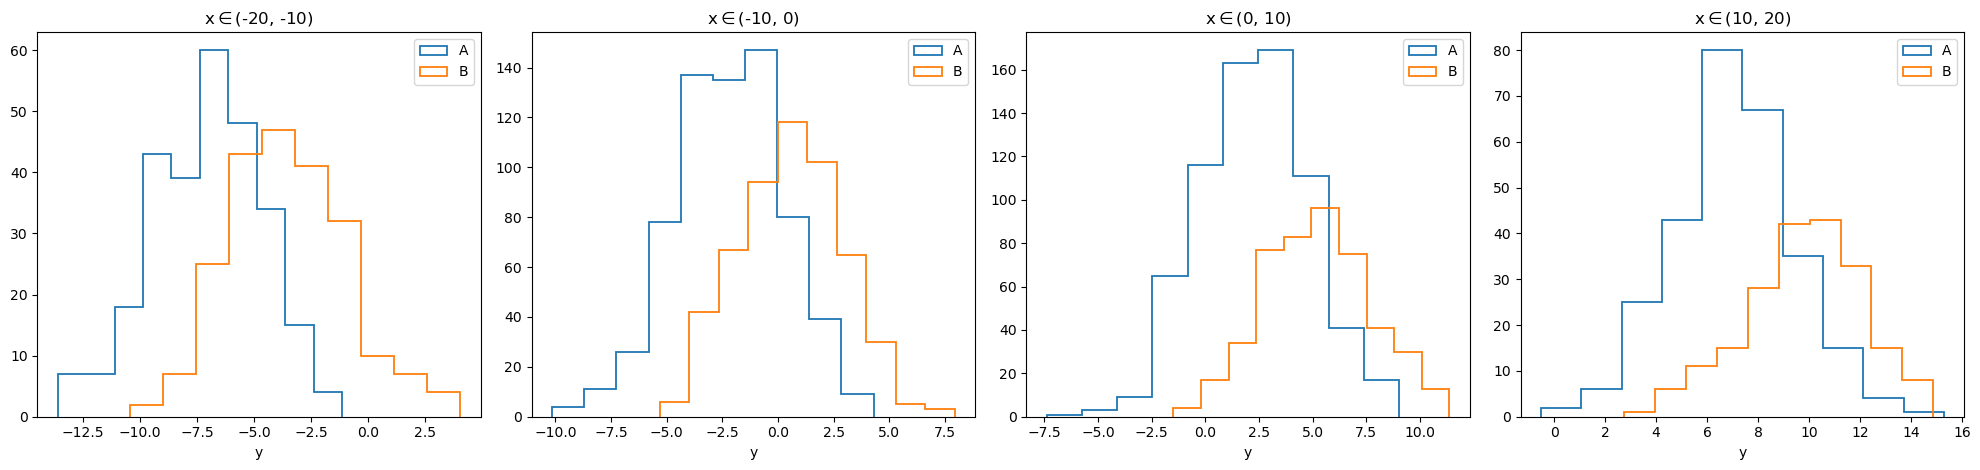

In [31]:
data.subplot_array(
    'hist', cols=['y'], histtype='step', linewidth=1.3, # note: kwcols is also supported
    plotgroups='class', # subset group for comparison within each subplot
    arraygroups=['x'], # subset group for comparison between each subplot
    )
plt.tight_layout()

Since there are too many columns, we can try to warp this $1\times n$ array:

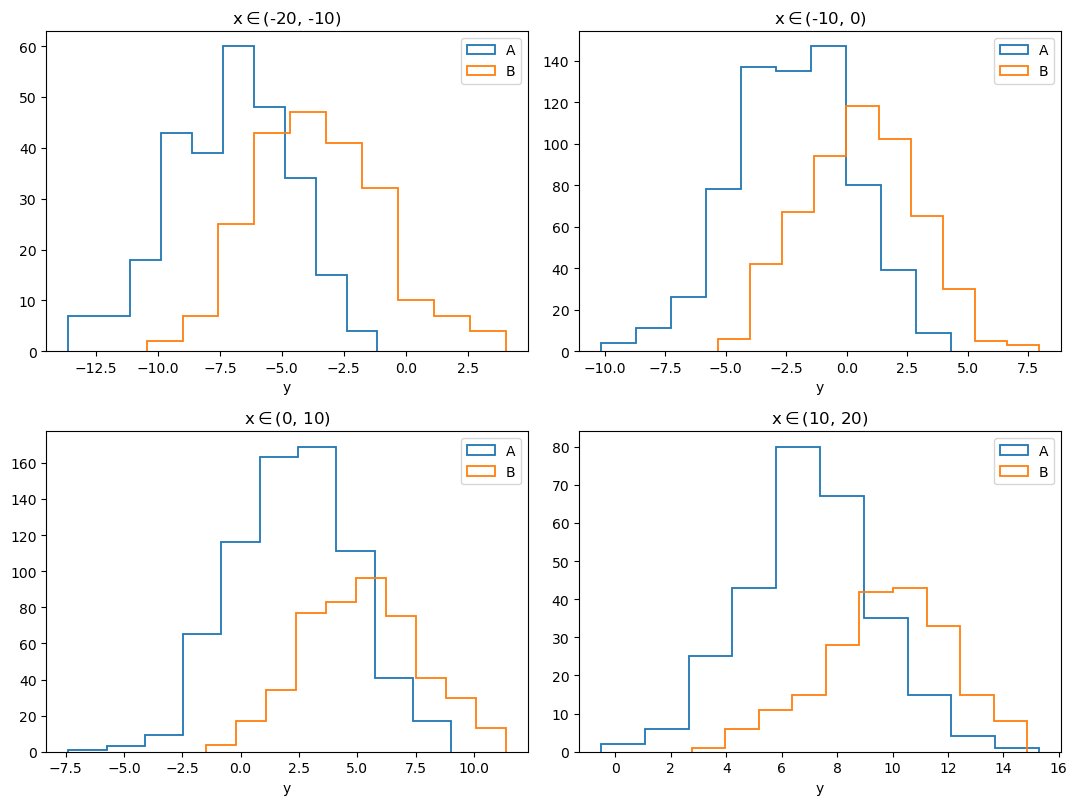

In [32]:
data.subplot_array(
    'hist', cols=['y'], histtype='step', linewidth=1.3, # note: kwcols is also supported
    plotgroups='class', # subset group for comparison within each subplot
    arraygroups=['x'], # subset group for comparison between each subplot
    autobreak=True, # automatically warp
    )
plt.tight_layout()

Now the $1\times 4$ subplot array is changed into a $2\times 2$ array.

Though not demostrated, `data.subplot_array` also accepts keyword arguments `kwcols`, `global_selection`, whic h are similar to `data.plot`.

### Advanced usage
**Note**: This part is for advanced users. If you are new to this package, you may skip this part for now.

#### Callback 
Sometimes you just want to do some operations on the axis of each subplot (after the plot is made):

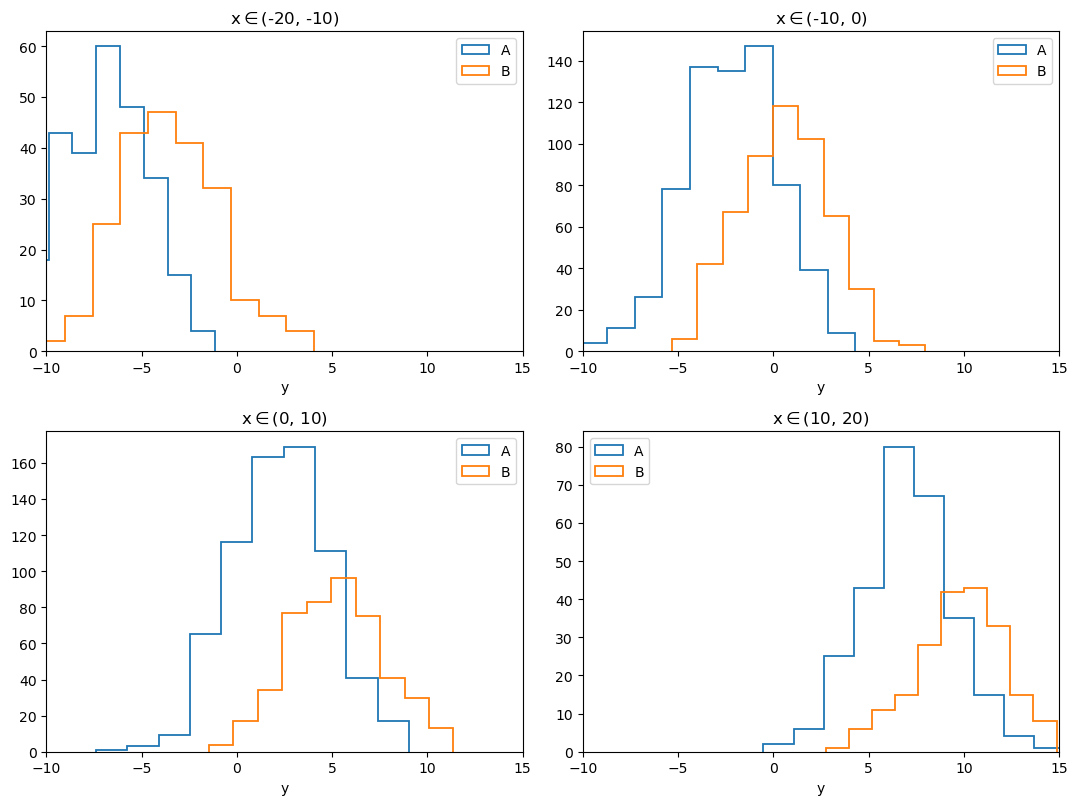

In [33]:
def callback(ax): # input a axis
    ax.set_xlim(-10, 15) # set xlim for each subplot

data.subplot_array(
    'hist', cols=['y'], histtype='step', linewidth=1.3, 
    plotgroups='class', arraygroups=['x'], autobreak=True, 
    ax_callback=callback, 
    )
plt.tight_layout()

#### Custom plot function
You can also define a custom plot function, similar to that for `data.plot`. However, This function should input an axis (e.g. a `matplotlib.axes._subplots.AxesSubplot` object), and return a function that is suitable for input of `data.plot`.

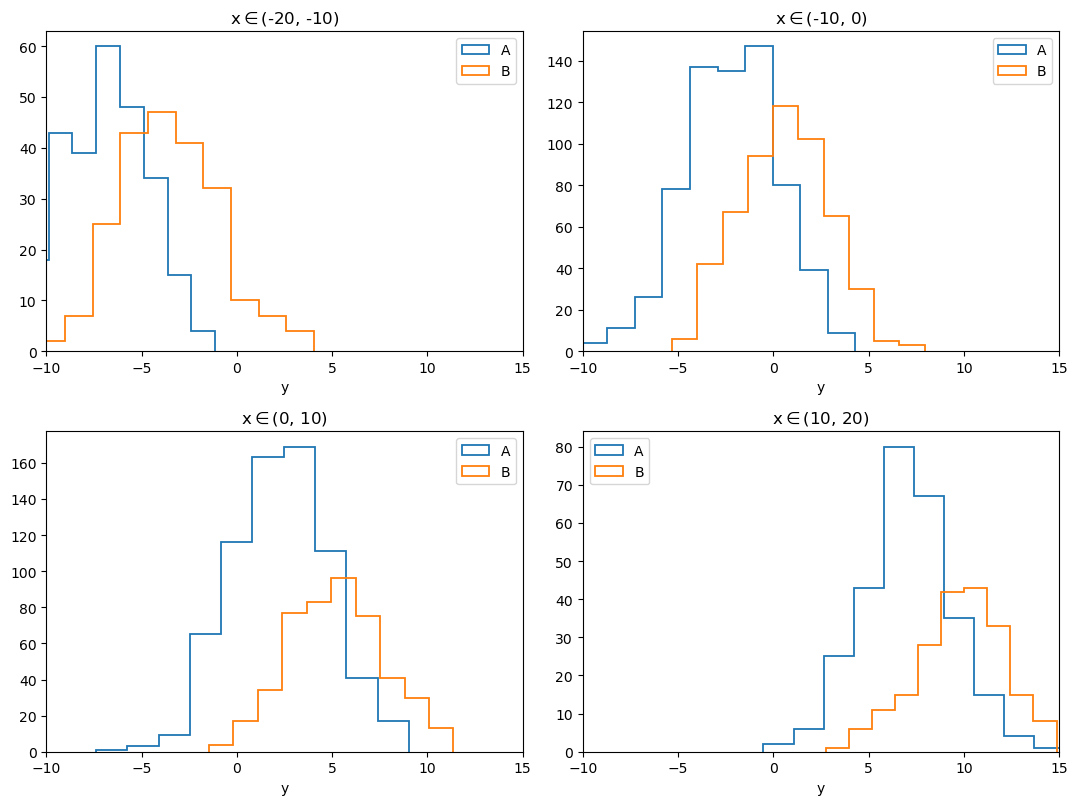

In [34]:
def my_plot_func(ax): # input an axis
    def hist(*args, **kwargs):
        ax.hist(*args, **kwargs)
        ax.set_xlim(-10, 15)
    return hist

data.subplot_array(
    my_plot_func, cols=['y'], histtype='step', linewidth=1.3, 
    plotgroups='class', arraygroups=['x'], autobreak=True, 
    )
plt.tight_layout()

#### Iterative keyword arguments for plot function
If the keywoard arguments (to be passed to the plot function) are different for each subset in ``plotgroups``, you may set them by `iter_kwargs`:

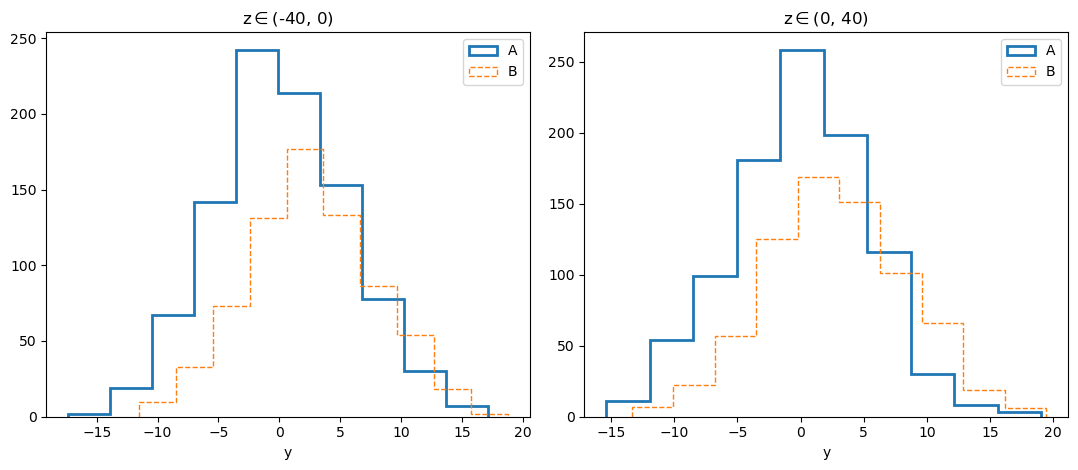

In [35]:
data.subplot_array(
    'hist', cols=['y'], histtype='step',
    plotgroups='class', arraygroups=['z'], # group 'class' consists of two subsets, 'A' and 'B'.
    iter_kwargs={'linestyle': ['-', '--'], # kwargs for subset 'A', 'B' respectively
                 'linewidth': [2, 1]},
    )
plt.tight_layout()

#### Handling axes of the figure
`data.subplot_array` returns figure and axes of the generated figure, similar to calling 
`fig, axes = plt.subplots(<...>).`

You can also generate your figure and axes in advance, and input the axes on which you would like to make plots to `data.subplot_array`:

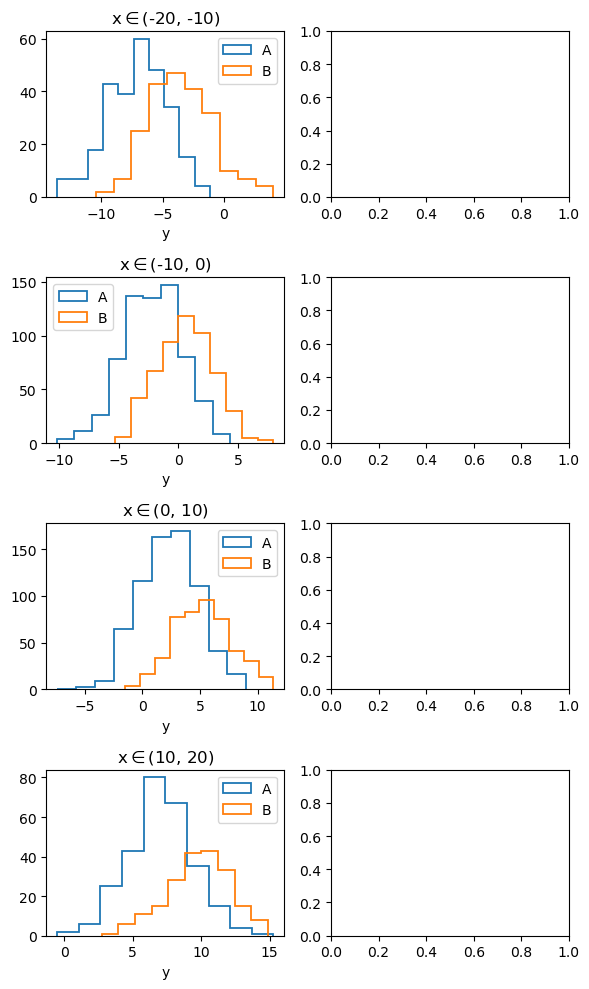

In [36]:
fig, axes = plt.subplots(4, 2, figsize=(6, 10))
left_panels = axes[:, 0]
fig, axes = data.subplot_array( # data.subplot_array itself returns fig, axes
    'hist', cols=['y'], histtype='step', linewidth=1.3, 
    plotgroups='class', arraygroups=['x'], 
    axes = left_panels, # make plots on the left panels 
    )
plt.tight_layout()